In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
%pylab inline
figsize(12, 9)
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='normal')
plt.rc('font', size=16)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
from tqdm import tnrange, tqdm_notebook, tqdm
import os
import sys
import requests
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx

Populating the interactive namespace from numpy and matplotlib


In [4]:
dataset = pd.read_csv('./Iowa_Liquor_Sales.csv',
                      dtype={'Volume Sold (Gallons)': np.float32,
                             'Pack': np.int32,
                             'Item Number': str,
                             'Vendor Number': str,
                             'Category': str,
                             'County Number': str,
                             'Store Location': str,
                             'Zip Code': str,
                             'Address': str,
                             'Store Name': str,
                             'Store Number': str,
                             'Invoice/Item Number': str,
                             'Date': str,
                             'City': str,
                             'County': str,
                             'Category Name': str,
                             'Vendor Name': str,
                             'Item Description': str,
                             'Bottle Volume (ml)': np.float32,
                             'State Bottle Cost': str,
                             'State Bottle Retail': str,
                             'Bottles Sold': np.int32,
                             'Sale (Dollars)': str,
                             'Volume Sold (Liters)': np.float32})

In [5]:
dataset.isnull().sum()

Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                   2376
City                      2375
Zip Code                  2420
Store Location            2375
County Number            79178
County                   79178
Category                  8020
Category Name            16086
Vendor Number                3
Vendor Name                  1
Item Number                  0
Item Description             0
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost           10
State Bottle Retail         10
Bottles Sold                 0
Sale (Dollars)              10
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

Источник данных с описанием по [ссылке](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

In [3]:
dataset.dropna(inplace=True)
dataset.drop(['Volume Sold (Gallons)', 'Pack', 'Item Number', 'Vendor Number', 'Category', 'County Number',
              'Store Location', 'Zip Code', 'Address', 'Store Name', 'Store Number', 'Invoice/Item Number'],
             axis=1, inplace=True)
dataset.replace('[\$,]', '', regex=True, inplace=True)
dataset.Date = pd.to_datetime(dataset.Date, infer_datetime_format=True)
dataset['Day of Week'] = dataset.Date.dt.dayofweek
dataset['Month'] = dataset.Date.dt.month
dataset['Year'] = dataset.Date.dt.year
dataset['Day of Year'] = dataset.Date.dt.dayofyear
batch_size = 100000
for row_pos in tqdm(range(0, dataset.shape[0], batch_size), desc='dataset formed'):
    dataset.loc[row_pos: row_pos + batch_size, 'City'] = dataset.loc[row_pos: row_pos + batch_size,\
                                                                     'City'].str.upper()
    dataset.loc[row_pos: row_pos + batch_size, 'County'] = dataset.loc[row_pos: row_pos + batch_size,\
                                                                       'County'].str.upper()
    dataset.loc[row_pos: row_pos + batch_size, 'Category Name'] = dataset.loc[row_pos: row_pos + batch_size,\
                                                                              'Category Name'].str.upper()
    dataset.loc[row_pos: row_pos + batch_size, 'Vendor Name'] = dataset.loc[row_pos: row_pos + batch_size,\
                                                                            'Vendor Name'].str.upper()
    dataset.loc[row_pos: row_pos + batch_size, 'Item Description'] = dataset.loc[row_pos: row_pos + batch_size,\
                                                                                 'Item Description'].str.upper()
dataset.loc[-batch_size:, 'City'] = dataset.loc[-batch_size:, 'City'].str.upper()
dataset.loc[-batch_size:, 'County'] = dataset.loc[-batch_size:, 'County'].str.upper()
dataset.loc[-batch_size:, 'Category Name'] = dataset.loc[-batch_size:, 'Category Name'].str.upper()
dataset.loc[-batch_size:, 'Vendor Name'] = dataset.loc[-batch_size:, 'Vendor Name'].str.upper()
dataset.loc[-batch_size:, 'Item Description'] = dataset.loc[-batch_size:, 'Item Description'].str.upper()
dataset.loc[dataset.loc[:, 'County'] == 'BUENA VIST', 'County'] = 'BUENA VISTA'
dataset.loc[dataset.loc[:, 'County'] == 'CERRO GORD', 'County'] = 'CERRO GORDO'
dataset.loc[dataset.loc[:, 'County'] == 'OBRIEN', 'County'] = "O'BRIEN"
dataset.loc[dataset.loc[:, 'County'] == 'POTTAWATTA', 'County'] = 'POTTAWATTAMIE'
dataset.loc[dataset.loc[:, 'City'] == 'KELLOG', 'City'] = 'KELLOGG'
dataset.loc[dataset.loc[:, 'City'] == "ARNOLD'S PARK", 'City'] = 'ARNOLDS PARK'
dataset.loc[dataset.loc[:, 'City'] == 'CLEARLAKE', 'City'] = 'CLEAR LAKE'
dataset.loc[dataset.loc[:, 'City'] == 'FT. ATKINSON', 'City'] = 'FORT ATKINSON'
dataset.loc[dataset.loc[:, 'City'] == 'GRAND MOUNDS', 'City'] = 'GRAND MOUND'
dataset.loc[dataset.loc[:, 'City'] == 'GUTTENBURG', 'City'] = 'GUTTENBERG'
dataset.loc[dataset.loc[:, 'City'] == 'MT PLEASANT', 'City'] = 'MOUNT PLEASANT'
dataset.loc[dataset.loc[:, 'City'] == 'MT VERNON', 'City'] = 'MOUNT VERNON'
dataset.loc[dataset.loc[:, 'City'] == 'OTUMWA', 'City'] = 'OTTUMWA'
dataset.loc[dataset.loc[:, 'City'] == 'OTTUWMA', 'City'] = 'OTTUMWA'
dataset.to_csv('./Processed_Iowa_Liquor_Sales.csv', index=False)

dataset formed: 100%|██████████| 125/125 [06:13<00:00,  2.98s/it]


In [2]:
dataset = pd.read_csv('./Processed_Iowa_Liquor_Sales.csv')
dataset.head()

,Date,City,County,Category Name,Vendor Name,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Day of Week,Month,Year,Day of Year
0,2015-11-09,WATERLOO,BLACK HAWK,DECANTERS & SPECIALTY PACKAGES,DUGGAN'S DISTILLERS PRODUCTS CORP,FORBIDDEN SECRET COFFEE PACK,1500,11.62,17.43,6,104.58,9.0,0,11,2015,313
1,2015-11-30,MUSCATINE,MUSCATINE,DECANTERS & SPECIALTY PACKAGES,JIM BEAM BRANDS,LAPHROAIG W/ WHISKEY STONES,750,19.58,29.37,4,117.48,3.0,0,11,2015,334
2,2015-11-11,HOLSTEIN,IDA,DECANTERS & SPECIALTY PACKAGES,DUGGAN'S DISTILLERS PRODUCTS CORP,FORBIDDEN SECRET COFFEE PACK,1500,11.62,17.43,1,17.43,1.5,2,11,2015,315
3,2015-11-18,ONAWA,MONONA,CREAM LIQUEURS,MHW LTD,"RUMCHATA ""GOCHATAS""",6000,99.00,148.50,1,148.50,6.0,2,11,2015,322
4,2015-11-23,PELLA,MARION,DECANTERS & SPECIALTY PACKAGES,DUGGAN'S DISTILLERS PRODUCTS CORP,FORBIDDEN SECRET COFFEE PACK,1500,11.62,17.43,6,104.58,9.0,0,11,2015,327


In [3]:
dataset.shape

(12495974, 16)

In [41]:
unique_categories, unique_counts = np.unique(dataset.loc[:, 'Category Name'], return_counts=True)

In [3]:
total_year_sales = dataset.loc[:, ['Year', 'Volume Sold (Liters)']].groupby('Year').sum()

In [4]:
total_year_sales_melted = pd.melt(total_year_sales.reset_index(), id_vars=['Year'],\
                                  var_name='объём', value_vars=['Volume Sold (Liters)'],\
                                  value_name='заказано в литрах')
total_year_sales_melted.rename(columns={'Year': 'год'}, inplace=True)

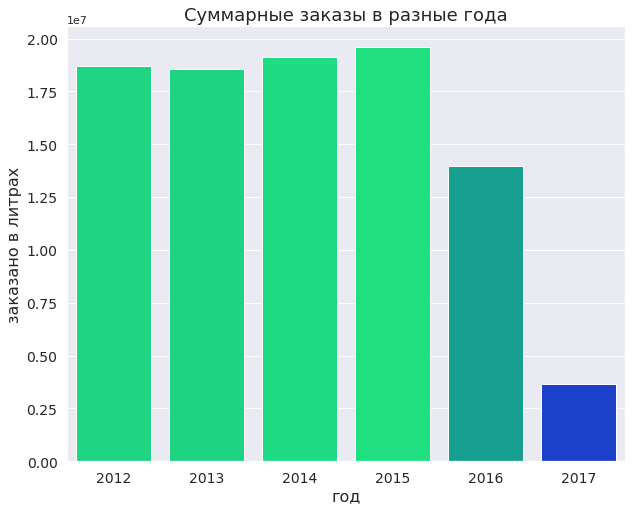

In [5]:
figsize(10, 8)
sns.set()
plt.title('Суммарные заказы в разные года', fontsize=18)
plt.xlabel('год', fontsize=16)
plt.ylabel('количество литров', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
norm = plt.Normalize(0, int(total_year_sales.loc[:, 'Volume Sold (Liters)'].max()))
colors = plt.cm.winter(norm(total_year_sales.loc[:, 'Volume Sold (Liters)'].as_matrix().astype(int)))
g = sns.barplot(x=total_year_sales_melted.columns[0], y=total_year_sales_melted.columns[2],\
                data=total_year_sales_melted, palette=colors)
plt.savefig('1g.png', bbox_inches='tight')
plt.show()

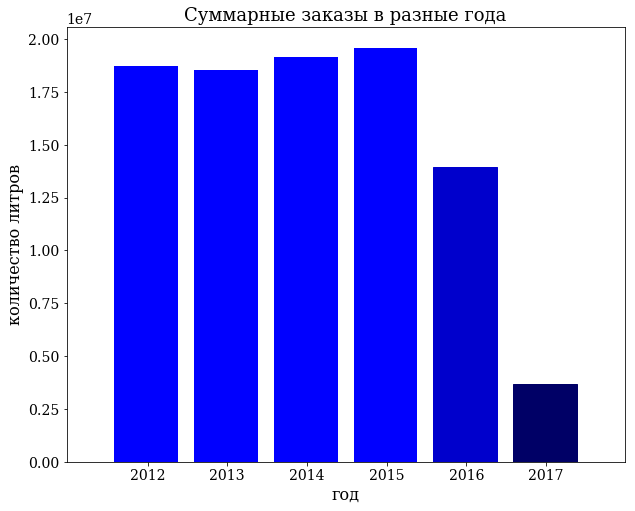

In [4]:
x = np.array(total_year_sales.index)
y = total_year_sales.as_matrix().ravel()
figsize(10, 8)
nd = np.arange(x.shape[0])
width = 0.8
#
#jet = cm = plt.get_cmap('jet') 
#cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
#scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#
barlist = plt.bar(nd, y, color=(0, 0, 1))
barlist[-2].set_color((0, 0, 0.8))
barlist[-1].set_color((0, 0, 0.4))
plt.xticks(nd + width / 50, tuple(str(year) for year in x), fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-1, x.shape[0])
plt.xlabel('год', fontsize=16)
plt.ylabel('количество литров', fontsize=16)
plt.title('Суммарные заказы в разные года', fontsize=18)
plt.style.use('seaborn')
plt.savefig('1g.png', bbox_inches='tight')
plt.show()

In [6]:
total_year_sales = dataset.loc[:, ['Day of Year', 'Year', 'Volume Sold (Liters)']].groupby(['Year',
                                                                                            'Day of Year']).sum()
total_year_sales.reset_index(inplace=True)
total_year_sales = total_year_sales.loc[total_year_sales.loc[:, 'Year'] < 2017, :]
total_year_sales.rename(columns={'Year': 'год'}, inplace=True)

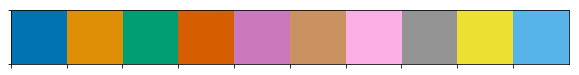

In [17]:
sns.palplot(sns.color_palette('colorblind'))

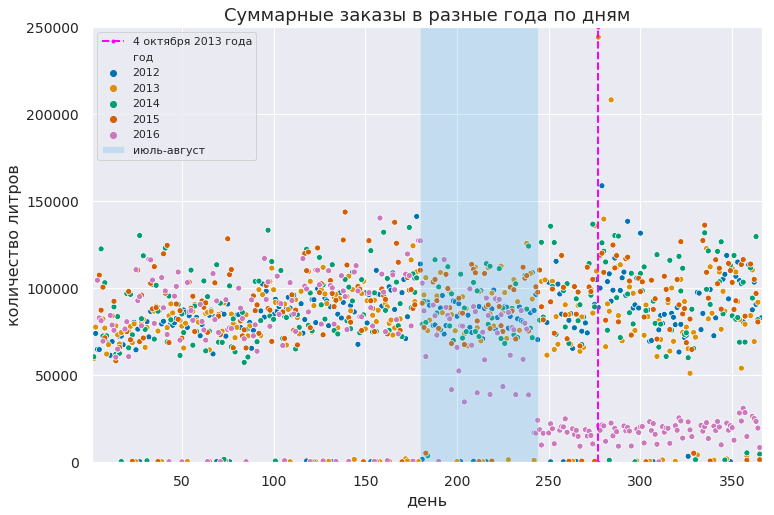

In [28]:
plt.figure(figsize=(12, 8))
sns.set()
plt.title('Суммарные заказы в разные года по дням', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
palette = sns.color_palette('colorblind')
g = sns.scatterplot(x='Day of Year', y='Volume Sold (Liters)', hue='год', data=total_year_sales,
                    palette={2012: palette[0],
                             2013: palette[1],
                             2014: palette[2],
                             2015: palette[3],
                             2016: palette[4]})
plt.xlabel(r'день', fontsize=16)
plt.ylabel(r'количество литров', fontsize=16)
plt.legend(frameon=True)
plt.fill_between(np.arange(180, 245), np.ones(65) * 250000, facecolor=palette[9], interpolate=True, alpha=0.25,
                 label='июль-август')
plt.axis([1, 366, 0, 250000])
special_day_1 = total_year_sales.loc[total_year_sales.loc[total_year_sales.loc[:, 'год'] == 2013,\
                                                          'Volume Sold (Liters)'].argmax(), 'Day of Year']
plt.axvline(x=special_day_1, color='magenta', linestyle='--', label=r'4 октября 2013 года',
            linewidth=2, marker='o', markersize=4)
plt.legend(frameon=True, loc=2)
plt.savefig('2g.png', bbox_inches='tight')
plt.show()

In [101]:
def smooth_series(df, window_size=3, threshold=0):
    res_df = df.copy()
    res_df = res_df.loc[res_df.loc[:, 'Volume Sold (Liters)'] > threshold, :]
    years = np.unique(res_df.loc[:, 'год'])
    for year in years:
        ser = res_df.loc[res_df.loc[:, 'год'] == year, 'Volume Sold (Liters)'].copy()
        res_ser = res_df.loc[res_df.loc[:, 'год'] == year, 'Volume Sold (Liters)'].copy()
        for number, idx in enumerate(ser.index):
            res_ser.loc[idx] = ser.iloc[max(0, number - window_size // 2):
                                        min(ser.shape[0], number + window_size // 2)].median()
        res_df.loc[res_ser.index.get_values(), 'Volume Sold (Liters)'] = res_ser.values
    return res_df

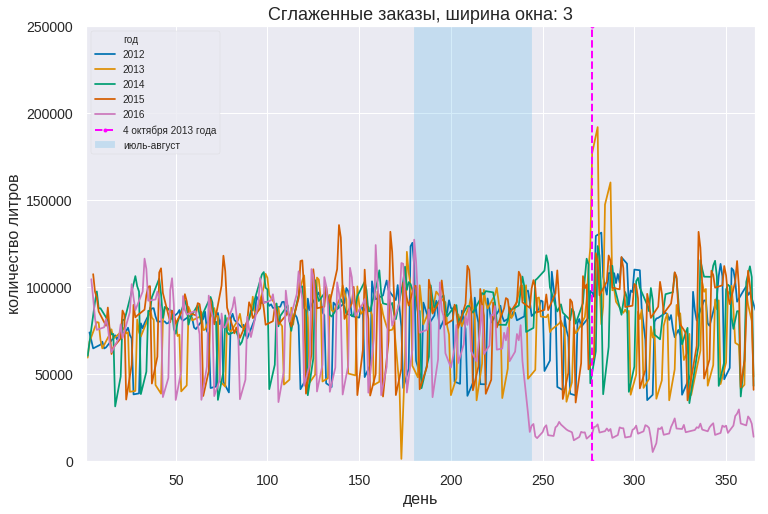

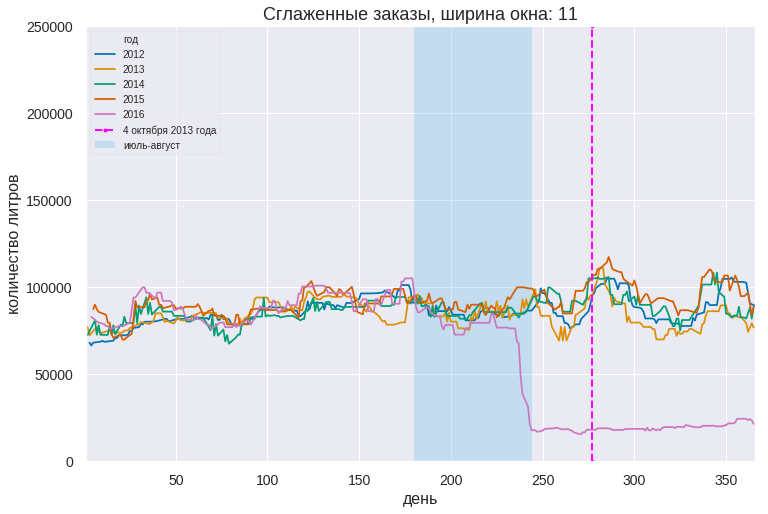

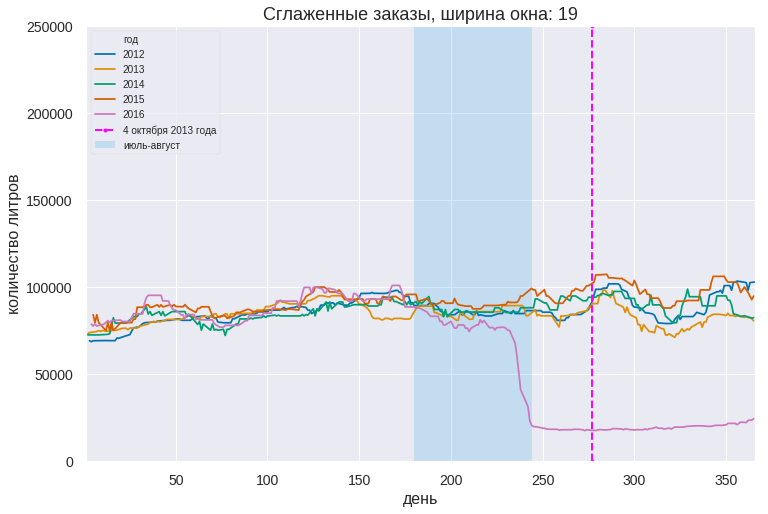

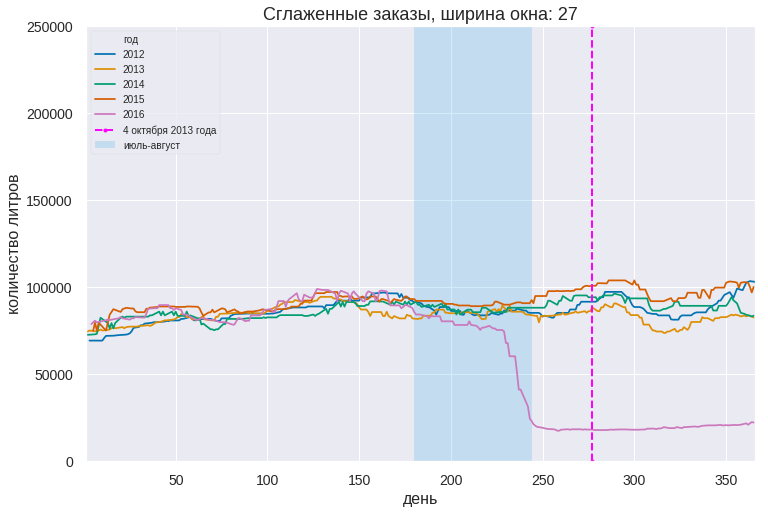

In [105]:
window_sizes = [3, 11, 19, 27]
for number, window_size in enumerate(window_sizes):
    plt.figure(figsize=(12, 8))
    sns.set()
    smoothed_total_year_sales = smooth_series(total_year_sales,
                                              window_size)
    plt.title('Сглаженные заказы, ширина окна: %i'%(window_size), fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.style.use('seaborn')
    palette = sns.color_palette('colorblind')
    g = sns.lineplot(x='Day of Year', y='Volume Sold (Liters)', hue='год', data=smoothed_total_year_sales,
                        palette={2012: palette[0],
                                 2013: palette[1],
                                 2014: palette[2],
                                 2015: palette[3],
                                 2016: palette[4]})
    plt.xlabel(r'день', fontsize=16)
    plt.ylabel(r'количество литров', fontsize=16)
    plt.legend(frameon=True)
    plt.fill_between(np.arange(180, 245), np.ones(65) * 250000, facecolor=palette[9], interpolate=True, alpha=0.25,
                     label='июль-август')
    plt.axis([1, 366, 0, 250000])
    special_day_1 = total_year_sales.loc[total_year_sales.loc[total_year_sales.loc[:, 'год'] == 2013,\
                                                              'Volume Sold (Liters)'].argmax(), 'Day of Year']
    plt.axvline(x=special_day_1, color='magenta', linestyle='--', label=r'4 октября 2013 года',
                linewidth=2, marker='o', markersize=4)
    plt.legend(frameon=True, loc=2)
    plt.savefig('2_%ig.png'%(number + 1), bbox_inches='tight')
    plt.show()

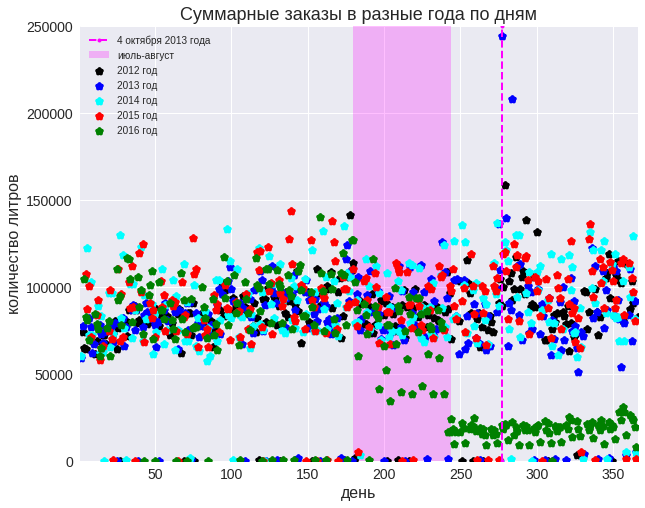

In [11]:
plt.figure(figsize=(10, 8))
plt.title('Суммарные заказы в разные года по дням', fontsize=18)
plt.xlabel(r'день', fontsize=16)
plt.ylabel(r'количество литров', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis([1, 366, 0, 250000])
special_day_1 = np.array(total_year_sales.loc[(2013,\
                slice(None))].index)[np.array(total_year_sales.loc[(2013, slice(None))]).ravel().argmax()]
plt.axvline(x=special_day_1, color='magenta', linestyle='--', label=r'4 октября 2013 года',
            linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(180, 245), np.ones(65) * 250000, facecolor='magenta', interpolate=True, alpha=0.25,
                 label='июль-август')
plt.scatter(np.array(total_year_sales.loc[(2012, slice(None))].index),
            np.array(total_year_sales.loc[(2012, slice(None))]).ravel(), label=r'2012 год', c='black',
            linewidth=4, marker='*', s=24)
plt.scatter(np.array(total_year_sales.loc[(2013, slice(None))].index),
            np.array(total_year_sales.loc[(2013, slice(None))]).ravel(), label=r'2013 год', c='blue',
            linewidth=4, marker='*', s=24)
plt.scatter(np.array(total_year_sales.loc[(2014, slice(None))].index),
            np.array(total_year_sales.loc[(2014, slice(None))]).ravel(), label=r'2014 год', c='cyan',
            linewidth=4, marker='*', s=24, alpha=1)
plt.scatter(np.array(total_year_sales.loc[(2015, slice(None))].index),
            np.array(total_year_sales.loc[(2015, slice(None))]).ravel(), label=r'2015 год', c='red',
            linewidth=4, marker='*', s=24)
plt.scatter(np.array(total_year_sales.loc[(2016, slice(None))].index),
            np.array(total_year_sales.loc[(2016, slice(None))]).ravel(), label=r'2016 год', c='green',
            linewidth=4, marker='*', s=24)
plt.legend(loc=2)
plt.style.use('seaborn')
plt.show()

In [8]:
total_year_sales = dataset.loc[:, ['Month', 'Year', 'Volume Sold (Liters)']].groupby(['Year', 'Month']).sum()
total_year_sales.reset_index(inplace=True)
total_year_sales.rename(columns={'Year': 'год', 'Month': 'месяц', 'Volume Sold (Liters)': 'количество литров'},
                        inplace=True)
total_year_sales = total_year_sales.loc[total_year_sales.loc[:, 'год'] < 2016, :]

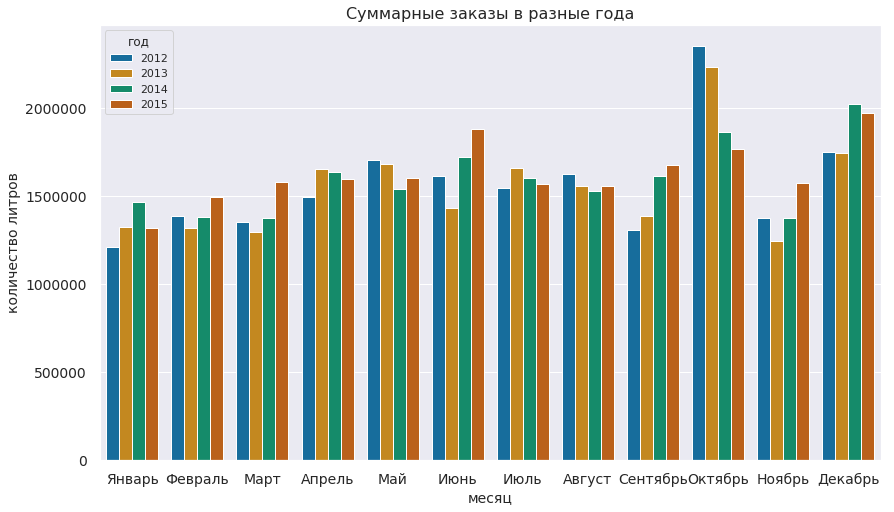

In [9]:
figsize(14, 8)
sns.set()
palette = sns.color_palette('colorblind')
g = sns.barplot(x='месяц', y='количество литров', hue='год',\
                data=total_year_sales, palette=palette)
plt.xlabel('месяц', fontsize=14)
plt.ylabel('количество литров', fontsize=14)
plt.title('Суммарные заказы в разные года', fontsize=16)
plt.xticks(np.arange(12), ('Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь',\
                             'Октябрь', 'Ноябрь', 'Декабрь'), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(frameon=True, loc=2, title='год')
plt.savefig('3g.png', bbox_inches='tight')
plt.show()

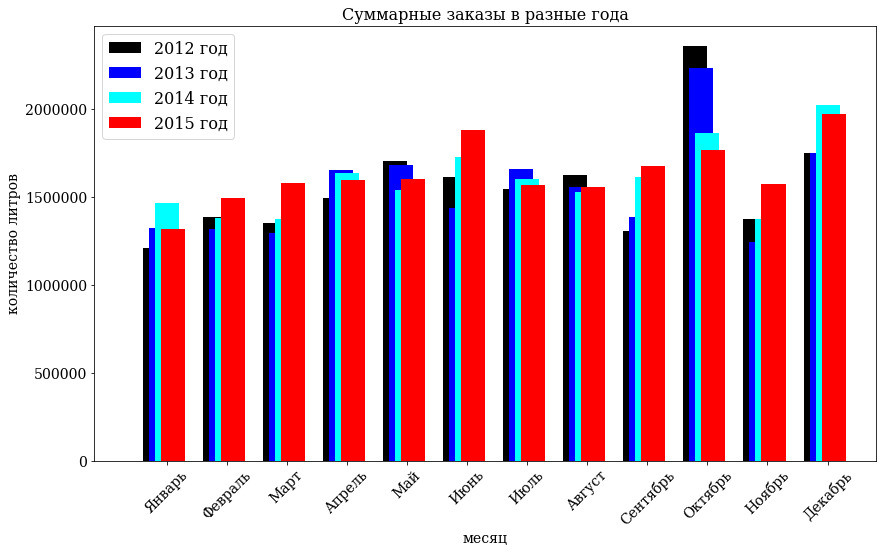

In [167]:
figsize(14, 8)
nd = np.arange(12)
width = 0.8
fig, ax = plt.subplots()
p1 = ax.bar(np.arange(12), total_year_sales.loc[(2012, slice(None))].as_matrix().ravel(), width / 2, color='black')
p2 = ax.bar(np.arange(12) + width / 8, total_year_sales.loc[(2013, slice(None))].as_matrix().ravel(), width / 2,\
            color='blue')
p3 = ax.bar(np.arange(12) + width / 4, total_year_sales.loc[(2014, slice(None))].as_matrix().ravel(),\
            width / 2, color='cyan')
p4 = ax.bar(np.arange(12) + 3 * width / 8, total_year_sales.loc[(2015, slice(None))].as_matrix().ravel(),\
            width / 2, color='red')
plt.xticks(nd + width / 4, ('Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь',\
                             'Октябрь', 'Ноябрь', 'Декабрь'))
ax.legend((p1[0], p2[0], p3[0], p4[0]), ('2012 год', '2013 год', '2014 год', '2015 год'))
plt.xlim(-1, 12)
plt.xticks(rotation=45)
plt.xlabel('месяц', fontsize=14)
plt.ylabel('количество литров', fontsize=14)
plt.title('Суммарные заказы в разные года', fontsize=16)
plt.show()

In [10]:
total_year_sales = dataset.loc[:, ['Day of Week', 'Year', 'Volume Sold (Liters)']]#.groupby(['Year',\
                                                                                  #          'Day of Week']).sum()
total_year_sales.rename(columns={'Day of Week': 'день недели',
                                 'Year': 'год',
                                 'Volume Sold (Liters)': 'количество литров'}, inplace=True)
total_year_sales = total_year_sales.loc[total_year_sales.loc[:, 'год'] < 2016, :]

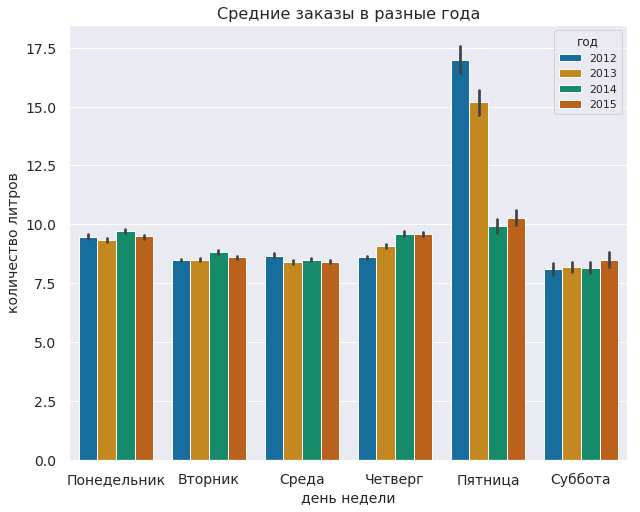

In [11]:
figsize(10, 8)
sns.set()
palette = sns.color_palette('colorblind')
g = sns.barplot(x='день недели', y='количество литров', hue='год' ,\
                data=total_year_sales, palette=palette)
plt.xticks(np.arange(6), ('Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота'), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('день недели', fontsize=14)
plt.ylabel('количество литров', fontsize=14)
plt.title('Средние заказы в разные года', fontsize=16)
plt.legend(frameon=True, title='год')
plt.savefig('4g.png', bbox_inches='tight')
plt.show()

In [12]:
total_year_sales = dataset.loc[:, ['Day of Week', 'Year', 'Volume Sold (Liters)']].groupby(['Year',\
                                                                                            'Day of Week']).sum()
total_year_sales.reset_index(inplace=True)
total_year_sales.rename(columns={'Day of Week': 'день недели',
                                 'Year': 'год',
                                 'Volume Sold (Liters)': 'количество литров'}, inplace=True)
total_year_sales = total_year_sales.loc[total_year_sales.loc[:, 'год'] < 2016, :]

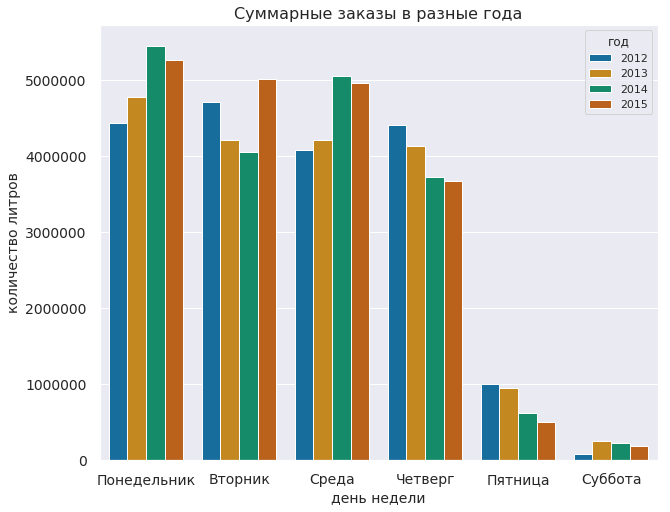

In [13]:
figsize(10, 8)
sns.set()
palette = sns.color_palette('colorblind')
g = sns.barplot(x='день недели', y='количество литров', hue='год' ,\
                data=total_year_sales, palette=palette)
plt.xticks(np.arange(6), ('Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота'), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('день недели', fontsize=14)
plt.ylabel('количество литров', fontsize=14)
plt.title('Суммарные заказы в разные года', fontsize=16)
plt.legend(frameon=True, title='год')
plt.savefig('4_1g.png', bbox_inches='tight')
plt.show()

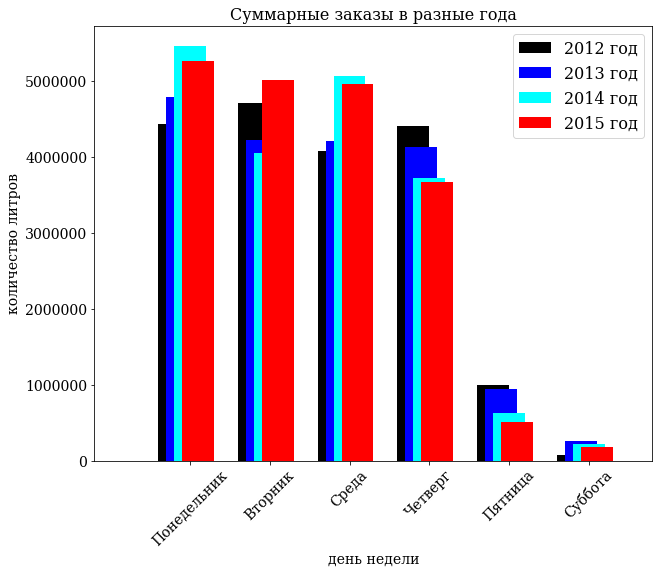

In [169]:
figsize(10, 8)
nd = np.arange(6)
width = 0.8
fig, ax = plt.subplots()
p1 = ax.bar(np.arange(6), total_year_sales.loc[(2012, slice(None))].as_matrix().ravel(), width / 2, color='black')
p2 = ax.bar(np.arange(6) + width / 8, total_year_sales.loc[(2013, slice(None))].as_matrix().ravel(), width / 2,\
            color='blue')
p3 = ax.bar(np.arange(6) + width / 4, total_year_sales.loc[(2014, slice(None))].as_matrix().ravel(),\
            width / 2, color='cyan')
p4 = ax.bar(np.arange(6) + 3 * width / 8, total_year_sales.loc[(2015, slice(None))].as_matrix().ravel(),\
            width / 2, color='red')
plt.xticks(nd + width / 4, ('Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота'))
ax.legend((p1[0], p2[0], p3[0], p4[0]), ('2012 год', '2013 год', '2014 год', '2015 год'))
plt.xlim(-1, 6)
plt.xticks(rotation=45)
plt.xlabel('день недели', fontsize=14)
plt.ylabel('количество литров', fontsize=14)
plt.title('Суммарные заказы в разные года', fontsize=16)
plt.show()

In [42]:
cat_df = pd.DataFrame({'Категория алкоголя': unique_categories, 'количество вхождений': unique_counts})
cat_df.sort_values(['количество вхождений'], ascending=False, inplace=True)
cat_df.set_index(drop=True, inplace=True, keys='Категория алкоголя')

In [43]:
cat_df

,количество вхождений
Категория алкоголя,
VODKA 80 PROOF,1255745
CANADIAN WHISKIES,1199556
STRAIGHT BOURBON WHISKIES,698830
SPICED RUM,668211
BLENDED WHISKIES,551093
VODKA FLAVORED,498464
WHISKEY LIQUEUR,450834
IMPORTED VODKA,445845
TEQUILA,431200


In [39]:
whisky_cat = ['CANADIAN WHISKIES', 'STRAIGHT BOURBON WHISKIES', 'BLENDED WHISKIES', 'WHISKEY LIQUEUR',
              'TENNESSEE WHISKIES', 'SCOTCH WHISKIES', 'IRISH WHISKIES', 'STRAIGHT RYE WHISKIES',
              'SINGLE BARREL BOURBON WHISKIES', 'CORN WHISKIES', 'IOWA DISTILLERY WHISKIES', 'JAPANESE WHISKY']

In [44]:
cat_df.loc[whisky_cat].sort_values(['количество вхождений'], ascending=False)

,количество вхождений
Категория алкоголя,
CANADIAN WHISKIES,1199556
STRAIGHT BOURBON WHISKIES,698830
BLENDED WHISKIES,551093
WHISKEY LIQUEUR,450834
TENNESSEE WHISKIES,315293
SCOTCH WHISKIES,246310
IRISH WHISKIES,117525
STRAIGHT RYE WHISKIES,73973
SINGLE BARREL BOURBON WHISKIES,12878


In [45]:
dataset = dataset[(dataset.loc[:, 'Category Name'] == 'CANADIAN WHISKIES') |\
                  (dataset.loc[:, 'Category Name'] == 'STRAIGHT BOURBON WHISKIES') |\
                  (dataset.loc[:, 'Category Name'] == 'BLENDED WHISKIES') |\
                  (dataset.loc[:, 'Category Name'] == 'WHISKEY LIQUEUR') |\
                  (dataset.loc[:, 'Category Name'] == 'TENNESSEE WHISKIES') |\
                  (dataset.loc[:, 'Category Name'] == 'SCOTCH WHISKIES') |\
                  (dataset.loc[:, 'Category Name'] == 'IRISH WHISKIES') |\
                  (dataset.loc[:, 'Category Name'] == 'STRAIGHT RYE WHISKIES') |\
                  (dataset.loc[:, 'Category Name'] == 'SINGLE BARREL BOURBON WHISKIES') |\
                  (dataset.loc[:, 'Category Name'] == 'CORN WHISKIES') |\
                  (dataset.loc[:, 'Category Name'] == 'IOWA DISTILLERY WHISKIES') |\
                  (dataset.loc[:, 'Category Name'] == 'JAPANESE WHISKY')]

In [46]:
dataset.to_csv('./Top_Whisky.csv', index=False)

In [2]:
dataset = pd.read_csv('./Top_Whisky.csv')
dataset.head()

,Date,City,County,Category Name,Vendor Name,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Day of Week,Month,Year,Day of Year
0,2014-02-26,DAVENPORT,SCOTT,IRISH WHISKIES,PROXIMO,BUSHMILLS IRISH WHISKEY,750,13.00,19.50,4,78.00,3.00,2,2,2014,57
1,2013-11-26,CHARITON,LUCAS,WHISKEY LIQUEUR,CHARLES JACQUIN/INDEPENDENT SPIRITS,SWEET REVENGE,750,10.98,16.47,6,98.82,4.50,1,11,2013,330
2,2013-04-17,OSKALOOSA,MAHASKA,CANADIAN WHISKIES,HOOD RIVER DISTILLERS INC.,PENDLETON CANADIAN WHISKY,750,12.10,18.65,2,37.30,1.50,2,4,2013,107
3,2012-05-24,CEDAR RAPIDS,LINN,CANADIAN WHISKIES,DIAGEO AMERICAS,CROWN ROYAL,750,14.50,21.74,1,21.74,0.75,3,5,2012,145
4,2012-10-18,GRIMES,POLK,BLENDED WHISKIES,LUXCO-ST LOUIS,CALVERT EXTRA BL WHISKEY,1750,11.02,16.53,1,16.53,1.75,3,10,2012,292


In [48]:
dataset.shape

(3670119, 16)

In [3]:
total_year_sales = pd.DataFrame(dataset.loc[:, ['Item Description', 'State Bottle Retail', 'State Bottle Cost',\
                   'Year']].groupby(['Year', 'Item Description']).apply(lambda x:\
                   ((x['State Bottle Retail'] - x['State Bottle Cost']) / x['State Bottle Cost']).mean()))

In [23]:
total_year_sales.loc[(2012, slice(None))].sort_values(by=0, ascending=False).head(10)

,0
Item Description,
WILD TURKEY 81,0.542376
BIRD DOG BLACKBERRY WHISKEY,0.541094
WHITETAIL CARAMEL FLAVORED WHISKEY,0.536331
WILD TURKEY AMERICAN HONEY,0.531448
EVAN WILLIAMS YR STR BOURBON,0.528354
SOUTHERN HOST WHISKEY LIQUEUR,0.528280
EARLY TIMES 36 MO KY STR BOURBON PET,0.527965
EVAN WILLIAMS STR BOURBON,0.527902
TULLAMORE DEW IRISH WHISKY,0.526805


In [24]:
total_year_sales.loc[(2013, slice(None))].sort_values(by=0, ascending=False).head(10)

,0
Item Description,
BIRD DOG MAPLE,0.596698
WHITETAIL CARAMEL FLAVORED WHISKEY,0.576168
BIRD DOG BLACKBERRY WHISKEY,0.565420
BIRD DOG PEACH FLAVORED WHISKEY,0.564419
TRIPLE CROWN BLENDED WHISKEY,0.554146
LEXINGTON,0.545033
FORTY CREEK,0.538255
SINFIRE,0.535210
WISER'S RYE,0.533938


In [25]:
total_year_sales.loc[(2014, slice(None))].sort_values(by=0, ascending=False).head(10)

,0
Item Description,
COUNTRY GAL,0.671977
PRAIRIE FIRE,0.671862
TRIPLE CROWN BLENDED WHISKEY,0.589239
PADDY BEE STING,0.535122
SINFIRE,0.530416
PADDY DEVIL'S APPLE,0.528836
DEWARS 12YR,0.524751
DEWARS HIGHLANDER HONEY,0.524496
EVAN WILLIAMS BLACK LABEL TRAVELER,0.524321


In [26]:
total_year_sales.loc[(2015, slice(None))].sort_values(by=0, ascending=False).head(10)

,0
Item Description,
RUSSELL'S RESERVE RYE 6YR,0.556664
RUSSELL'S RESERVE 10YR,0.551376
FORTY CREEK COOPER POT,0.533532
FORTY CREEK,0.531788
PENDLETON CANADIAN WHISKY,0.528446
EVAN WILLIAMS CHERRY RESERVE,0.526446
EVAN WILLIAMS YR STR BOURBON,0.524408
CANADIAN LTD WHISKY CONVENIENCE PACK,0.522736
SOUTHERN HOST WHISKEY LIQUEUR,0.522693


In [4]:
total_year_sales.reset_index(inplace=True)
total_year_sales = total_year_sales.loc[total_year_sales.loc[:, 'Year'] < 2016, :]
total_year_sales.rename(columns={'Year': 'год', 'Item Description': 'марка', 0: 'относительная разница'},
                        inplace=True)
total_year_brand_sales = total_year_sales.copy()

In [5]:
total_year_sales = total_year_sales.loc[(total_year_sales.loc[:, 'марка'] =='WILD TURKEY 81') |\
                                        (total_year_sales.loc[:, 'марка'] =='BIRD DOG BLACKBERRY WHISKEY') |\
                                        (total_year_sales.loc[:, 'марка'] =='BIRD DOG MAPLE') |\
                                        (total_year_sales.loc[:, 'марка'] =='WHITETAIL CARAMEL FLAVORED WHISKEY') |\
                                        (total_year_sales.loc[:, 'марка'] =='COUNTRY GAL') |\
                                        (total_year_sales.loc[:, 'марка'] =='PRAIRIE FIRE') |\
                                        (total_year_sales.loc[:, 'марка'] =="RUSSELL'S RESERVE RYE 6YR") |\
                                        (total_year_sales.loc[:, 'марка'] =="RUSSELL'S RESERVE 10YR"), :]

In [6]:
year_stats = total_year_brand_sales.loc[:, ['год',\
             'относительная разница']].groupby('год').agg([np.mean, np.std])
year_stats.columns = year_stats.columns.droplevel(0)

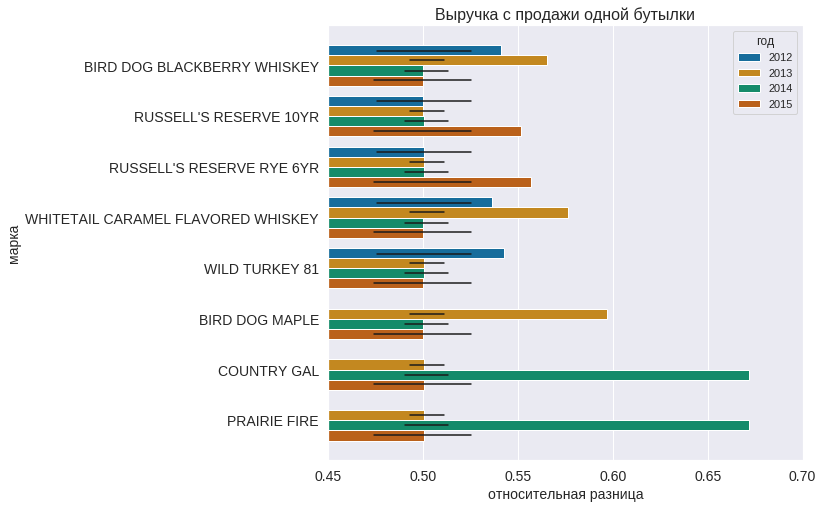

In [7]:
figsize(8.5, 8)
sns.set()
palette = sns.color_palette('colorblind')
g = sns.barplot(x='относительная разница', y='марка', hue='год' ,\
                data=total_year_sales, palette=palette)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('марка', fontsize=14)
plt.xlabel('относительная разница', fontsize=14)
plt.title('Выручка с продажи одной бутылки', fontsize=16)
plt.legend(frameon=True, title='год')
plt.xlim([0.45, 0.7])
for center in range(8):
    if center < 5:
        plt.plot([year_stats.loc[2012, 'mean'] - year_stats.loc[2012, 'std'],\
                  year_stats.loc[2012, 'mean'] + year_stats.loc[2012, 'std']],\
                 [center - 0.29,\
                  center - 0.29], color='k')
    plt.plot([year_stats.loc[2013, 'mean'] - year_stats.loc[2013, 'std'],\
              year_stats.loc[2013, 'mean'] + year_stats.loc[2013, 'std']],\
             [center - 0.1,\
              center - 0.1], color='k')
    plt.plot([year_stats.loc[2014, 'mean'] - year_stats.loc[2014, 'std'],\
              year_stats.loc[2014, 'mean'] + year_stats.loc[2014, 'std']],\
             [center + 0.1,\
              center + 0.1], color='k')
    plt.plot([year_stats.loc[2015, 'mean'] - year_stats.loc[2015, 'std'],\
              year_stats.loc[2015, 'mean'] + year_stats.loc[2015, 'std']],\
             [center + 0.29,\
              center + 0.29], color='k')
plt.style.use('seaborn')
plt.savefig('5g.png', bbox_inches='tight')
plt.show()

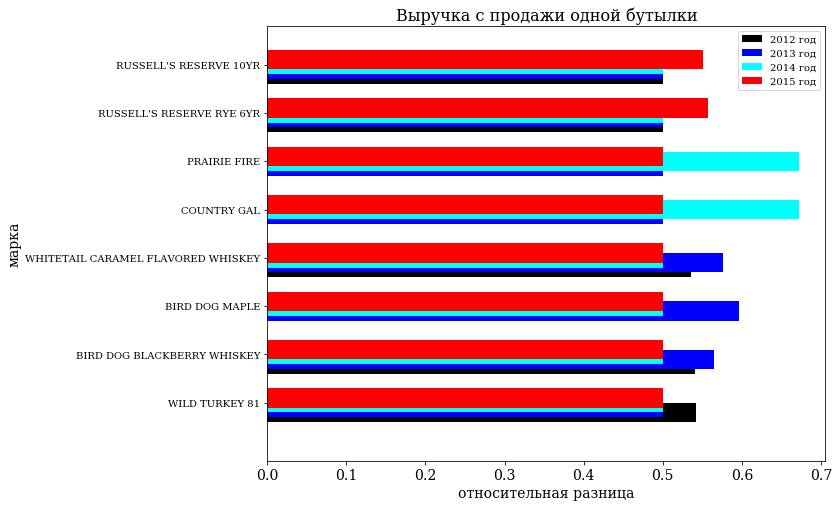

In [105]:
figsize(10, 8)
nd = np.arange(8)
width = 0.8
fig, ax = plt.subplots()
p1 = ax.barh(np.array([0, 1, 3, 6, 7]),\
            np.array([float(total_year_sales.loc[(2012, 'WILD TURKEY 81'), :]),
                      float(total_year_sales.loc[(2012, 'BIRD DOG BLACKBERRY WHISKEY'), :]),
                      float(total_year_sales.loc[(2012, 'WHITETAIL CARAMEL FLAVORED WHISKEY'), :]),
                      float(total_year_sales.loc[(2012, "RUSSELL'S RESERVE RYE 6YR"), :]),
                      float(total_year_sales.loc[(2012, "RUSSELL'S RESERVE 10YR"), :])]),\
            width / 2, color='black')
p2 = ax.barh(np.array([0, 1, 2, 3, 4, 5, 6, 7]) + width / 8,\
            np.array([float(total_year_sales.loc[(2013, 'WILD TURKEY 81'), :]),
                      float(total_year_sales.loc[(2013, 'BIRD DOG BLACKBERRY WHISKEY'), :]),
                      float(total_year_sales.loc[(2013, 'BIRD DOG MAPLE'), :]),
                      float(total_year_sales.loc[(2013, 'WHITETAIL CARAMEL FLAVORED WHISKEY'), :]),
                      float(total_year_sales.loc[(2013, 'COUNTRY GAL'), :]),
                      float(total_year_sales.loc[(2013, 'PRAIRIE FIRE'), :]),
                      float(total_year_sales.loc[(2013, "RUSSELL'S RESERVE RYE 6YR"), :]),
                      float(total_year_sales.loc[(2013, "RUSSELL'S RESERVE 10YR"), :])]), width / 2,\
            color='blue')
p3 = ax.barh(np.array([0, 1, 2, 3, 4, 5, 6, 7]) + width / 4,\
            np.array([float(total_year_sales.loc[(2014, 'WILD TURKEY 81'), :]),
                      float(total_year_sales.loc[(2014, 'BIRD DOG BLACKBERRY WHISKEY'), :]),
                      float(total_year_sales.loc[(2014, 'BIRD DOG MAPLE'), :]),
                      float(total_year_sales.loc[(2014, 'WHITETAIL CARAMEL FLAVORED WHISKEY'), :]),
                      float(total_year_sales.loc[(2014, 'COUNTRY GAL'), :]),
                      float(total_year_sales.loc[(2014, 'PRAIRIE FIRE'), :]),
                      float(total_year_sales.loc[(2014, "RUSSELL'S RESERVE RYE 6YR"), :]),
                      float(total_year_sales.loc[(2014, "RUSSELL'S RESERVE 10YR"), :])]),\
            width / 2, color='cyan')
p4 = ax.barh(np.array([0, 1, 2, 3, 4, 5, 6, 7]) + 3 * width / 8,
            np.array([float(total_year_sales.loc[(2015, 'WILD TURKEY 81'), :]),
                      float(total_year_sales.loc[(2015, 'BIRD DOG BLACKBERRY WHISKEY'), :]),
                      float(total_year_sales.loc[(2015, 'BIRD DOG MAPLE'), :]),
                      float(total_year_sales.loc[(2015, 'WHITETAIL CARAMEL FLAVORED WHISKEY'), :]),
                      float(total_year_sales.loc[(2015, 'COUNTRY GAL'), :]),
                      float(total_year_sales.loc[(2015, 'PRAIRIE FIRE'), :]),
                      float(total_year_sales.loc[(2015, "RUSSELL'S RESERVE RYE 6YR"), :]),
                      float(total_year_sales.loc[(2015, "RUSSELL'S RESERVE 10YR"), :])]),\
            width / 2, color='red')
plt.yticks(nd + width / 4, ('WILD TURKEY 81', 'BIRD DOG BLACKBERRY WHISKEY', 'BIRD DOG MAPLE',
                            'WHITETAIL CARAMEL FLAVORED WHISKEY', 'COUNTRY GAL', 'PRAIRIE FIRE',
                            "RUSSELL'S RESERVE RYE 6YR", "RUSSELL'S RESERVE 10YR"), fontsize=10)
ax.legend((p1[0], p2[0], p3[0], p4[0]), ('2012 год', '2013 год', '2014 год', '2015 год'))
plt.ylim(-1, 8)
#plt.xticks(rotation=60)
plt.ylabel('марка', fontsize=14)
plt.xlabel('относительная разница', fontsize=14)
plt.title('Выручка с продажи одной бутылки', fontsize=16)
plt.show()

In [3]:
total_year_sales = pd.DataFrame(dataset.loc[:, ['Item Description', 'State Bottle Retail', 'State Bottle Cost',\
                   'Year', 'Bottles Sold']].groupby(['Year', 'Item Description']).apply(lambda x:\
                   ((x['State Bottle Retail'] - x['State Bottle Cost']) * x['Bottles Sold']).sum()))

In [110]:
total_year_sales.loc[(2012, slice(None)), :].sort_values(by=0, ascending=False).head(10).index

0
Year Item Description                         
2012 BLACK VELVET                   3600626.05
     JACK DANIELS OLD #7 BLACK LBL  2965255.87
     CROWN ROYAL CANADIAN WHISKY    2151714.07
     TEMPLETON RYE                  1691732.65
     JIM BEAM                       1080870.42
     SEAGRAMS 7 CROWN BL WHISKEY    1006605.23
     CROWN ROYAL                     919817.00
     SOUTHERN COMFORT                839871.93
     FIREBALL CINNAMON WHISKEY       781484.61
     JAMESON                         754131.83

In [111]:
total_year_sales.loc[(2013, slice(None)), :].sort_values(by=0, ascending=False).head(10)

0
Year Item Description                         
2013 BLACK VELVET                   3787614.41
     JACK DANIELS OLD #7 BLACK LBL  3120613.70
     CROWN ROYAL CANADIAN WHISKY    2209070.31
     FIREBALL CINNAMON WHISKEY      1546129.81
     JIM BEAM                       1122501.30
     CROWN ROYAL                    1008387.50
     SEAGRAMS 7 CROWN BL WHISKEY     973033.46
     JAMESON                         890117.25
     TEMPLETON RYE                   843948.70
     SOUTHERN COMFORT                822953.81

In [112]:
total_year_sales.loc[(2014, slice(None)), :].sort_values(by=0, ascending=False).head(10)

0
Year Item Description                         
2014 BLACK VELVET                   3986923.94
     JACK DANIELS OLD #7 BLACK LBL  3225542.14
     FIREBALL CINNAMON WHISKEY      2499801.00
     CROWN ROYAL CANADIAN WHISKY    2233079.07
     JIM BEAM                       1175621.65
     CROWN ROYAL                    1033026.90
     JAMESON                        1023902.54
     SEAGRAMS 7 CROWN BL WHISKEY     992141.91
     SOUTHERN COMFORT                810600.66
     TEMPLETON RYE                   736814.80

In [113]:
total_year_sales.loc[(2015, slice(None)), :].sort_values(by=0, ascending=False).head(10)

0
Year Item Description                         
2015 BLACK VELVET                   4134233.75
     JACK DANIELS OLD #7 BLACK LBL  3331286.69
     FIREBALL CINNAMON WHISKEY      2501777.81
     CROWN ROYAL CANADIAN WHISKY    2293593.74
     JIM BEAM                       1203462.70
     JAMESON                        1203393.72
     CROWN ROYAL                    1096071.66
     CROWN ROYAL REGAL APPLE         970289.49
     SEAGRAMS 7 CROWN BL WHISKEY     952781.56
     SOUTHERN COMFORT                762681.32

In [4]:
total_year_sales.reset_index(inplace=True)
total_year_sales = total_year_sales.loc[total_year_sales.loc[:, 'Year'] < 2016, :]
total_year_sales.rename(columns={'Year': 'год', 'Item Description': 'марка', 0: 'абсолютная разница, $'},
                        inplace=True)
year_stats = total_year_sales.loc[:, ['год',\
             'абсолютная разница, $']].groupby('год').agg([np.mean, np.std])
year_stats.columns = year_stats.columns.droplevel(0)

In [5]:
year_stats

,mean,std
год,,
2012,61182.380206,283119.190849
2013,55388.819607,272527.037017
2014,53697.224180,277260.875218
2015,53632.669952,276922.136133


In [6]:
total_year_sales = total_year_sales.loc[(total_year_sales.loc[:, 'марка'] == 'BLACK VELVET') |\
                                        (total_year_sales.loc[:, 'марка'] == 'JACK DANIELS OLD #7 BLACK LBL') |\
                                        (total_year_sales.loc[:, 'марка'] == 'CROWN ROYAL CANADIAN WHISKY') |\
                                        (total_year_sales.loc[:, 'марка'] == 'TEMPLETON RYE') |\
                                        (total_year_sales.loc[:, 'марка'] == 'JIM BEAM') |\
                                        (total_year_sales.loc[:, 'марка'] == 'SEAGRAMS 7 CROWN BL WHISKEY') |\
                                        (total_year_sales.loc[:, 'марка'] == 'CROWN ROYAL') |\
                                        (total_year_sales.loc[:, 'марка'] == 'SOUTHERN COMFORT') |\
                                        (total_year_sales.loc[:, 'марка'] == 'FIREBALL CINNAMON WHISKEY') |\
                                        (total_year_sales.loc[:, 'марка'] == 'JAMESON'), :]

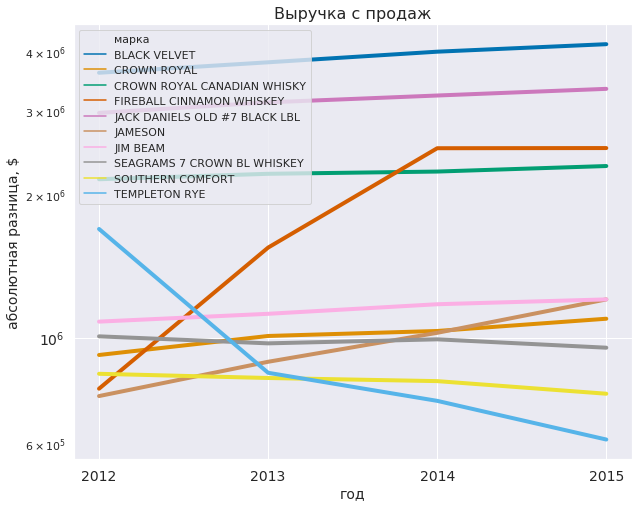

In [18]:
figsize(10, 8)
sns.set()
palette = sns.color_palette('colorblind')
g = sns.lineplot(x='год', y='абсолютная разница, $', hue='марка' ,\
                data=total_year_sales, palette=palette, lw=4)
plt.xticks((2012, 2013, 2014, 2015), fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('абсолютная разница, $', fontsize=14)
plt.xlabel('год', fontsize=14)
plt.title('Выручка с продаж', fontsize=16)
plt.legend(frameon=True, loc=2)
plt.yscale('log')
plt.savefig('6_3g.png', bbox_inches='tight')
plt.show()

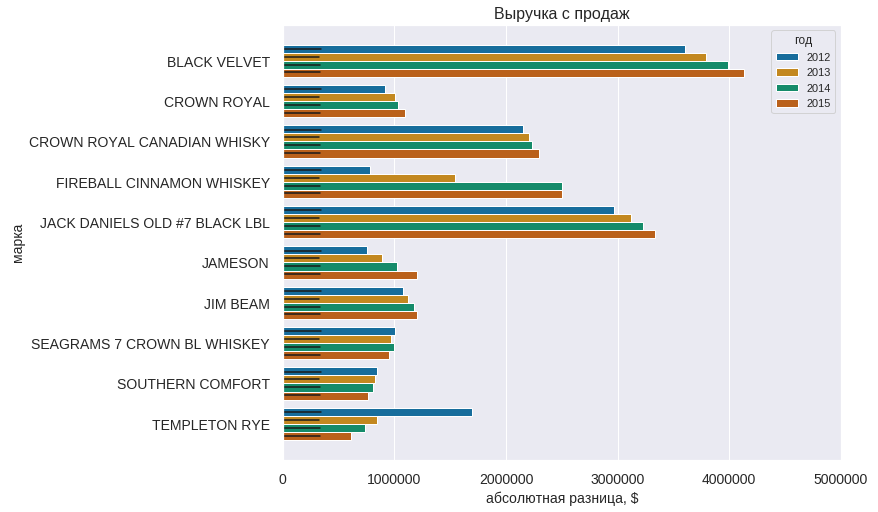

In [12]:
figsize(10, 8)
sns.set()
palette = sns.color_palette('colorblind')
g = sns.barplot(x='абсолютная разница, $', y='марка', hue='год' ,\
                data=total_year_sales, palette=palette)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('марка', fontsize=14)
plt.xlabel('абсолютная разница, $', fontsize=14)
plt.title('Выручка с продаж', fontsize=16)
plt.legend(frameon=True, title='год')
plt.xlim([0, 5e+6])
for center in range(10):
    plt.plot([year_stats.loc[2012, 'mean'] - year_stats.loc[2012, 'std'],\
              year_stats.loc[2012, 'mean'] + year_stats.loc[2012, 'std']],\
             [center - 0.29,\
              center - 0.29], color='k')
    plt.plot([year_stats.loc[2013, 'mean'] - year_stats.loc[2013, 'std'],\
              year_stats.loc[2013, 'mean'] + year_stats.loc[2013, 'std']],\
             [center - 0.1,\
              center - 0.1], color='k')
    plt.plot([year_stats.loc[2014, 'mean'] - year_stats.loc[2014, 'std'],\
              year_stats.loc[2014, 'mean'] + year_stats.loc[2014, 'std']],\
             [center + 0.1,\
              center + 0.1], color='k')
    plt.plot([year_stats.loc[2015, 'mean'] - year_stats.loc[2015, 'std'],\
              year_stats.loc[2015, 'mean'] + year_stats.loc[2015, 'std']],\
             [center + 0.29,\
              center + 0.29], color='k')
plt.savefig('6g.png', bbox_inches='tight')
plt.style.use('seaborn')
#sns.set(rc={'figure.facecolor':'cornflowerblue'})
plt.show()

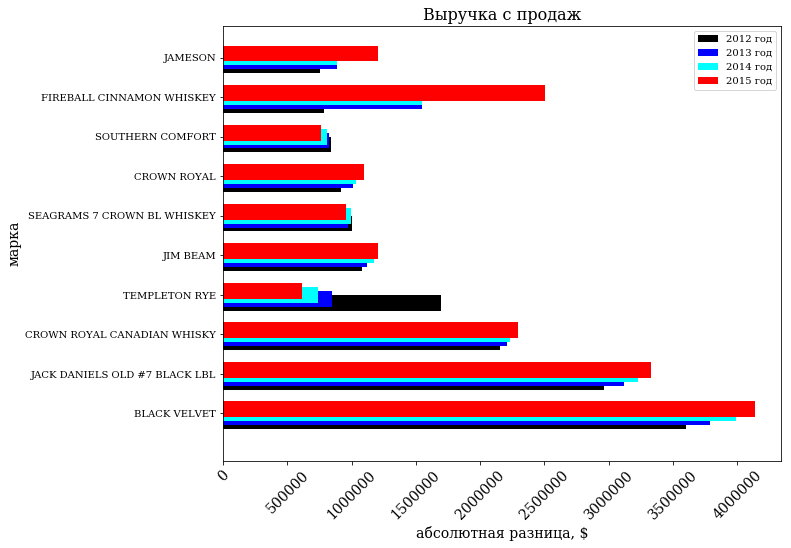

In [145]:
figsize(10, 8)
nd = np.arange(10)
width = 0.8
fig, ax = plt.subplots()
p1 = ax.barh(np.arange(10),\
            np.array([float(total_year_sales.loc[(2012, 'BLACK VELVET'), :]),
                      float(total_year_sales.loc[(2012, 'JACK DANIELS OLD #7 BLACK LBL'), :]),
                      float(total_year_sales.loc[(2012, 'CROWN ROYAL CANADIAN WHISKY'), :]),
                      float(total_year_sales.loc[(2012, "TEMPLETON RYE"), :]),
                      float(total_year_sales.loc[(2012, "JIM BEAM"), :]),
                      float(total_year_sales.loc[(2012, 'SEAGRAMS 7 CROWN BL WHISKEY'), :]),
                      float(total_year_sales.loc[(2012, 'CROWN ROYAL'), :]),
                      float(total_year_sales.loc[(2012, 'SOUTHERN COMFORT'), :]),
                      float(total_year_sales.loc[(2012, "FIREBALL CINNAMON WHISKEY"), :]),
                      float(total_year_sales.loc[(2012, "JAMESON"), :])]),\
            width / 2, color='black')
p2 = ax.barh(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) + width / 8,\
            np.array([float(total_year_sales.loc[(2013, 'BLACK VELVET'), :]),
                      float(total_year_sales.loc[(2013, 'JACK DANIELS OLD #7 BLACK LBL'), :]),
                      float(total_year_sales.loc[(2013, 'CROWN ROYAL CANADIAN WHISKY'), :]),
                      float(total_year_sales.loc[(2013, 'TEMPLETON RYE'), :]),
                      float(total_year_sales.loc[(2013, 'JIM BEAM'), :]),
                      float(total_year_sales.loc[(2013, 'SEAGRAMS 7 CROWN BL WHISKEY'), :]),
                      float(total_year_sales.loc[(2013, "CROWN ROYAL"), :]),
                      float(total_year_sales.loc[(2013, "SOUTHERN COMFORT"), :]),
                      float(total_year_sales.loc[(2013, 'FIREBALL CINNAMON WHISKEY'), :]),
                      float(total_year_sales.loc[(2013, "JAMESON"), :])]), width / 2,\
            color='blue')
p3 = ax.barh(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) + width / 4,\
            np.array([float(total_year_sales.loc[(2014, 'BLACK VELVET'), :]),
                      float(total_year_sales.loc[(2014, 'JACK DANIELS OLD #7 BLACK LBL'), :]),
                      float(total_year_sales.loc[(2014, 'CROWN ROYAL CANADIAN WHISKY'), :]),
                      float(total_year_sales.loc[(2014, 'TEMPLETON RYE'), :]),
                      float(total_year_sales.loc[(2014, 'JIM BEAM'), :]),
                      float(total_year_sales.loc[(2014, 'SEAGRAMS 7 CROWN BL WHISKEY'), :]),
                      float(total_year_sales.loc[(2014, "CROWN ROYAL"), :]),
                      float(total_year_sales.loc[(2014, "SOUTHERN COMFORT"), :]),
                      float(total_year_sales.loc[(2013, 'FIREBALL CINNAMON WHISKEY'), :]),
                      float(total_year_sales.loc[(2013, "JAMESON"), :])]),\
            width / 2, color='cyan')
p4 = ax.barh(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) + 3 * width / 8,
            np.array([float(total_year_sales.loc[(2015, 'BLACK VELVET'), :]),
                      float(total_year_sales.loc[(2015, 'JACK DANIELS OLD #7 BLACK LBL'), :]),
                      float(total_year_sales.loc[(2015, 'CROWN ROYAL CANADIAN WHISKY'), :]),
                      float(total_year_sales.loc[(2015, 'TEMPLETON RYE'), :]),
                      float(total_year_sales.loc[(2015, 'JIM BEAM'), :]),
                      float(total_year_sales.loc[(2015, 'SEAGRAMS 7 CROWN BL WHISKEY'), :]),
                      float(total_year_sales.loc[(2015, "CROWN ROYAL"), :]),
                      float(total_year_sales.loc[(2015, "SOUTHERN COMFORT"), :]),
                      float(total_year_sales.loc[(2015, "FIREBALL CINNAMON WHISKEY"), :]),
                      float(total_year_sales.loc[(2015, "JAMESON"), :])]),\
            width / 2, color='red')
plt.yticks(nd + width / 4, ('BLACK VELVET', 'JACK DANIELS OLD #7 BLACK LBL', 'CROWN ROYAL CANADIAN WHISKY',\
                            'TEMPLETON RYE', 'JIM BEAM', 'SEAGRAMS 7 CROWN BL WHISKEY', 'CROWN ROYAL',\
                            'SOUTHERN COMFORT', 'FIREBALL CINNAMON WHISKEY', 'JAMESON'), fontsize=10)
ax.legend((p1[0], p2[0], p3[0], p4[0]), ('2012 год', '2013 год', '2014 год', '2015 год'))
plt.ylim(-1, 10)
plt.ylabel('марка', fontsize=14)
plt.xlabel('абсолютная разница, $', fontsize=14)
plt.xticks(rotation=45)
plt.title('Выручка с продаж', fontsize=16)
plt.show()

In [19]:
total_year_sales = pd.DataFrame({'Year': dataset.loc[:, 'Year'],
                                 'Cost diff': dataset.loc[:, 'State Bottle Retail'] -
                                              dataset.loc[:, 'State Bottle Cost'],
                                 'State Bottle Cost': dataset.loc[:, 'State Bottle Cost']})
total_year_sales = total_year_sales.loc[total_year_sales.loc[:, 'Year'] < 2016, :]

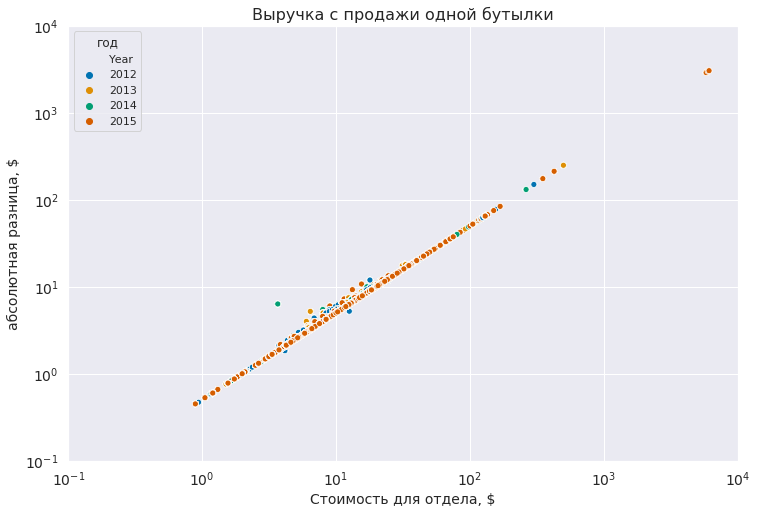

In [20]:
plt.figure(figsize=(12, 8))
sns.set()
plt.title('Выручка с продажи одной бутылки', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
palette = sns.color_palette('colorblind')
g = sns.scatterplot(x='State Bottle Cost', y='Cost diff', hue='Year', data=total_year_sales,
                    palette={2012: palette[0],
                             2013: palette[1],
                             2014: palette[2],
                             2015: palette[3]})
plt.xlabel(r'государственная цена, $', fontsize=14)
plt.ylabel(r'абсолютная разница, $', fontsize=14)
plt.legend(frameon=True, title='год')
plt.xscale('log')
plt.yscale('log')
plt.axis([0.1, 10000, 0.1, 10000])
plt.savefig('6_1g.png', bbox_inches='tight')
plt.show()

In [14]:
total_year_sales = total_year_sales.loc[:, ['Cost diff', 'State Bottle Cost']]
total_year_sales.rename(columns={'Cost diff': 'абсолютная разница, $',
                                 'State Bottle Cost': 'государственная цена, $'}, inplace=True)

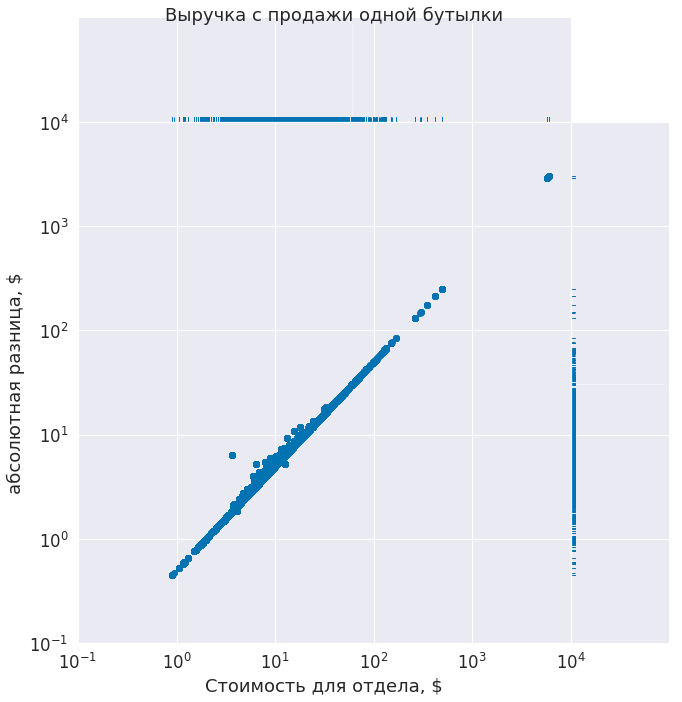

In [48]:
sns.set(font_scale=1.5)
palette = sns.color_palette('colorblind')
g = sns.jointplot(x='государственная цена, $', y='абсолютная разница, $', data=total_year_sales,
                  height=10, xlim=(0.1, 10000), ylim=(0.1, 10000), kind='scatter',
                  marginal_kws={'bins': 100, 'rug': True}, s=40, linewidth=1,
                  space=0, color=palette[0])
ax = g.ax_joint
g.fig.suptitle('Выручка с продажи одной бутылки', fontsize=18)
ax.set_xscale('log')
ax.set_yscale('log')
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')
plt.savefig('6_2g.png', bbox_inches='tight')
plt.show()

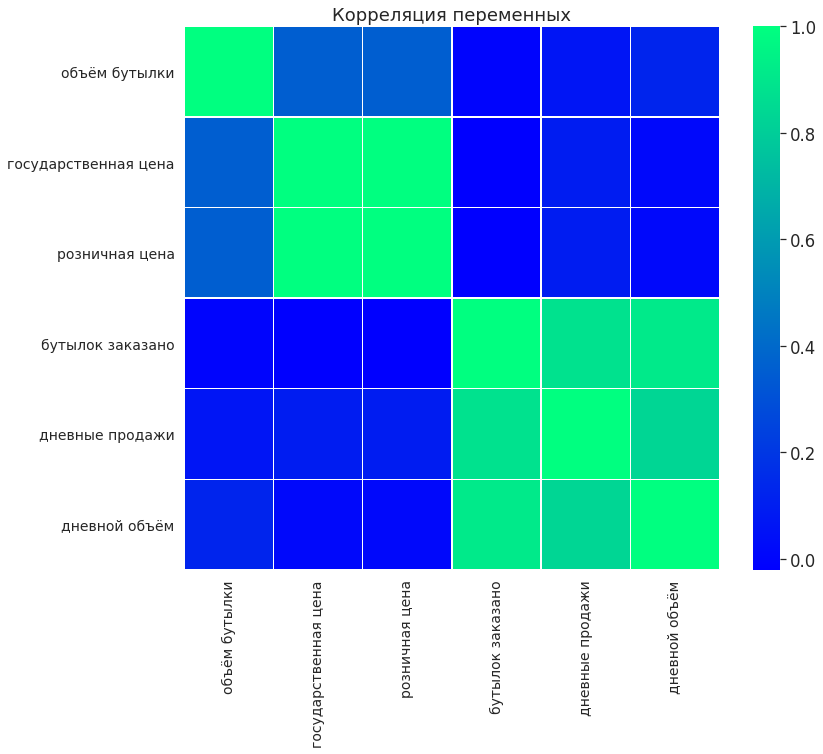

In [21]:
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.5)
stats = dataset.loc[:, ['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 
                        'Sale (Dollars)', 'Volume Sold (Liters)']].corr()
stats.index = ['объём бутылки', 'государственная цена', 'розничная цена', 'бутылок заказано',
               'дневные продажи', 'дневной объём']
stats.rename(columns={'Bottle Volume (ml)': 'объём бутылки',
                      'State Bottle Cost': 'государственная цена',
                      'State Bottle Retail': 'розничная цена',
                      'Bottles Sold': 'бутылок заказано',
                      'Sale (Dollars)': 'дневные продажи',
                      'Volume Sold (Liters)': 'дневной объём'}, inplace=True)
g = sns.heatmap(stats, cmap=plt.cm.winter, linewidths=0.5)
plt.title('Корреляция переменных', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('9g.png', bbox_inches='tight')
plt.show()

In [31]:
total_year_sales = dataset.loc[(dataset.loc[:, 'Item Description'] == 'BLACK VELVET') |\
                   (dataset.loc[:, 'Item Description'] == 'JACK DANIELS OLD #7 BLACK LBL'),
                   ['Item Description', 'State Bottle Retail', 'Year', 'Bottle Volume (ml)']]
total_year_sales = total_year_sales.loc[total_year_sales.loc[:, 'Year'] < 2016, :]

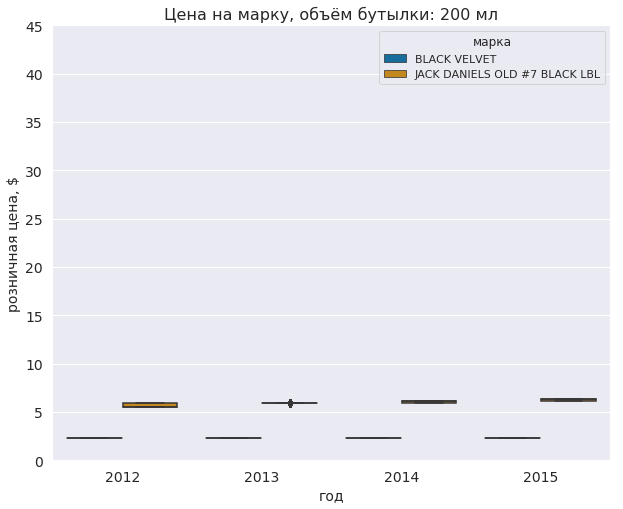

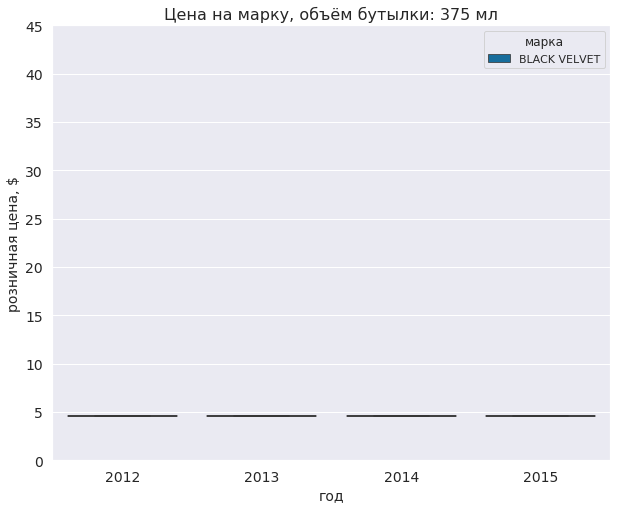

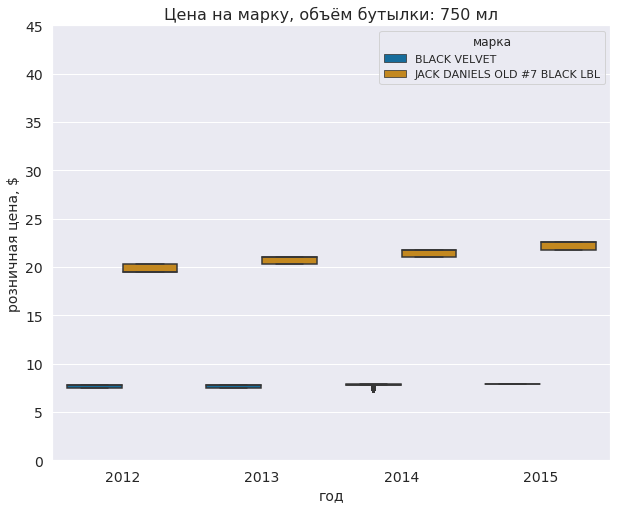

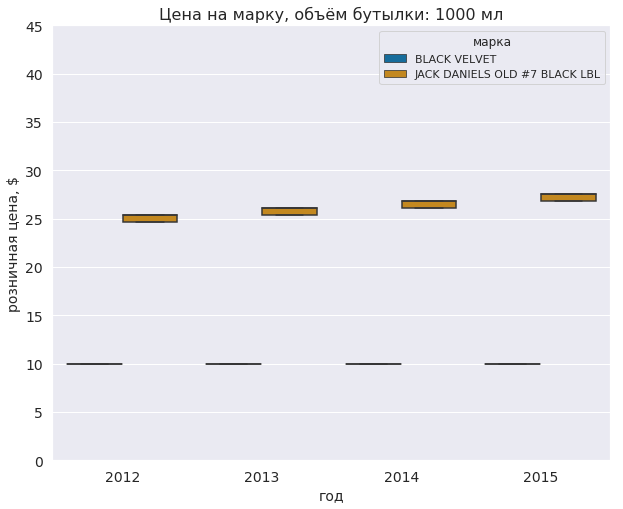

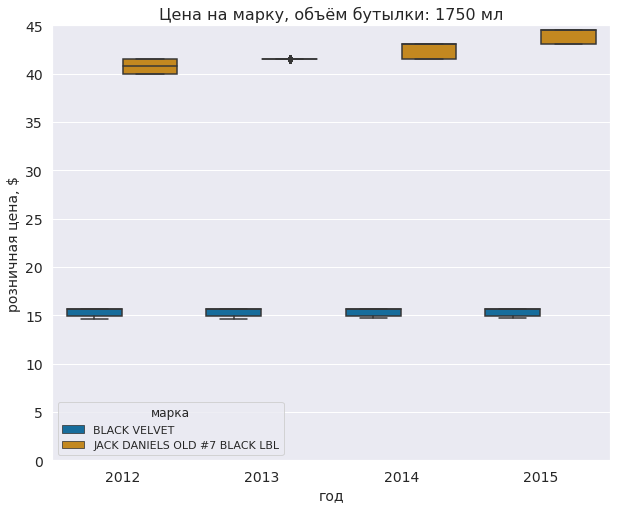

In [34]:
for number, vol in enumerate(np.unique(total_year_sales.loc[:, 'Bottle Volume (ml)'])):
    plt.figure(figsize=(10, 8))
    sns.set()
    palette = sns.color_palette('colorblind')
    g = sns.boxplot(x='Year', y='State Bottle Retail', hue='Item Description',
                    data=total_year_sales.loc[total_year_sales.loc[:, 'Bottle Volume (ml)'] == vol,
                                              ['Item Description', 'State Bottle Retail', 'Year']],
                    palette=palette)
    plt.title('Цена на марку, объём бутылки: %i мл'%(vol), fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(r'год', fontsize=14)
    plt.ylabel(r'розничная цена, $', fontsize=14)
    plt.legend(frameon=True, title='марка')
    plt.ylim([0, 45])
    plt.savefig('10_%ig.png'%(number + 1), bbox_inches='tight')
    plt.show()

In [ ]:
#order sales of top 10 drinks in time, box plot(black velvet and jack daniels separated by years), heat map of correlations(Bottle Volume (ml), State Bottle Cost, State Bottle Retail, Bottles Sold, Sale (Dollars), Volume Sold (Liters)), geomaps(litres and years, mean price and deviation and years; geotag: city)

In [15]:
unique_vol, counts_vol = np.unique(dataset.loc[:, 'Bottle Volume (ml)'], return_counts=True)

In [16]:
vol_df = pd.DataFrame({'объём бутылки, мл': unique_vol, 'количество заказов': counts_vol})
vol_df.sort_values(['количество заказов'], ascending=False, inplace=True)
vol_df.set_index(drop=True, inplace=True, keys='объём бутылки, мл')
vol_df

,количество заказов
"объём бутылки, мл",
750,1486254
1750,830335
1000,513985
375,402491
500,137159
200,123996
3000,54868
600,54354
300,52360


In [13]:
total_year_sales = dataset.loc[:, ['Item Description', 'Bottle Volume (ml)',\
                                                'Bottles Sold']].groupby(['Item Description',\
                                                                          'Bottle Volume (ml)']).sum()

In [148]:
total_year_sales.loc[('BLACK VELVET', slice(None)), :]

Bottles Sold
Item Description Bottle Volume (ml)              
BLACK VELVET     200                       541076
                 375                       693869
                 750                       761314
                 1000                      705293
                 1750                     2521271

In [149]:
total_year_sales.loc[('JACK DANIELS OLD #7 BLACK LBL', slice(None)), :]

Bottles Sold
Item Description              Bottle Volume (ml)              
JACK DANIELS OLD #7 BLACK LBL 200                       165882
                              750                       602324
                              1000                      829246
                              1750                      234290

In [151]:
total_year_sales.loc[('CROWN ROYAL CANADIAN WHISKY', slice(None)), :]

Bottles Sold
Item Description            Bottle Volume (ml)              
CROWN ROYAL CANADIAN WHISKY 200                        74543
                            375                       240523
                            1000                      771356
                            1750                      165432

In [18]:
vol_df.reset_index(inplace=True)

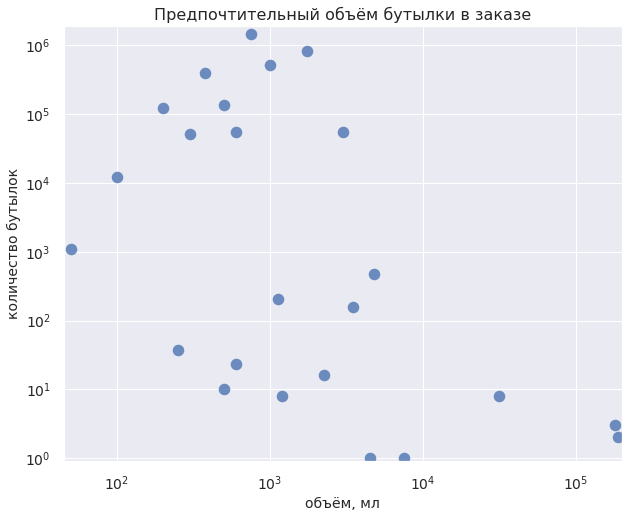

In [60]:
plt.figure(figsize=(10, 8))
sns.set()
palette = sns.color_palette('colorblind')
g = sns.regplot(x='объём бутылки, мл', y='количество заказов', data=vol_df, fit_reg=False, scatter_kws={'s': 134})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Предпочтительный объём бутылки в заказе', fontsize=16)
plt.xlabel(r'объём, мл', fontsize=14)
plt.xscale('log')
plt.ylabel(r'количество бутылок', fontsize=14)
plt.yscale('log')
plt.legend(loc=2)
plt.axis([45, 200000, 0.9, 1900000])
plt.savefig('7g.png', bbox_inches='tight')
plt.show()

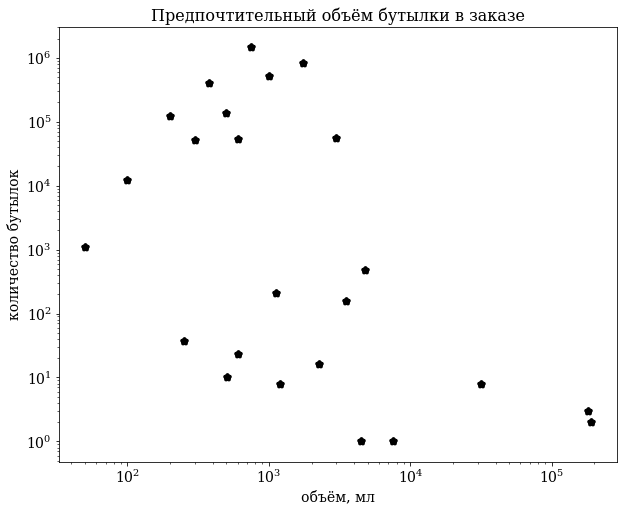

In [153]:
plt.figure(figsize=(10, 8))
plt.title('Предпочтительный объём бутылки в заказе', fontsize=16)
plt.xlabel(r'объём, мл', fontsize=14)
plt.xscale('log')
plt.ylabel(r'количество бутылок', fontsize=14)
plt.yscale('log')
#plt.axis([1, 366, 0, 250000])
plt.scatter(np.array(vol_df.index),
            np.array(vol_df.as_matrix()).ravel(), c='black',
            linewidth=4, marker='*', s=24)
plt.legend(loc=2)
plt.show()

In [157]:
total_year_sales.loc[('CROWN ROYAL CANADIAN WHISKY', slice(None)), :]

Bottles Sold
Item Description            Bottle Volume (ml)              
CROWN ROYAL CANADIAN WHISKY 200                        74543
                            375                       240523
                            1000                      771356
                            1750                      165432

In [62]:
total_year_sales.reset_index(inplace=True)
total_year_sales.rename(columns={'Item Description': 'марка',
                                 'Bottle Volume (ml)': 'объём бутылки, мл',
                                 'Bottles Sold': 'количество бутылок'}, inplace=True)
total_year_sales = total_year_sales.loc[(total_year_sales.loc[:, 'марка'] == 'BLACK VELVET') |\
                                        (total_year_sales.loc[:, 'марка'] == 'JACK DANIELS OLD #7 BLACK LBL') |\
                                        (total_year_sales.loc[:, 'марка'] == 'CROWN ROYAL CANADIAN WHISKY'), :]

In [63]:
total_year_sales

,марка,"объём бутылки, мл",количество бутылок
155,BLACK VELVET,200,541076
156,BLACK VELVET,375,693869
157,BLACK VELVET,750,761314
158,BLACK VELVET,1000,705293
159,BLACK VELVET,1750,2521271
454,CROWN ROYAL CANADIAN WHISKY,200,74543
455,CROWN ROYAL CANADIAN WHISKY,375,240523
456,CROWN ROYAL CANADIAN WHISKY,1000,771356
457,CROWN ROYAL CANADIAN WHISKY,1750,165432
927,JACK DANIELS OLD #7 BLACK LBL,200,165882


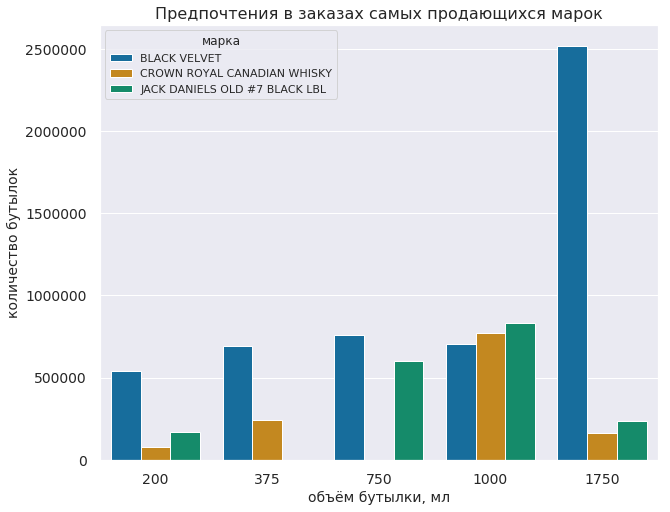

In [68]:
figsize(10, 8)
sns.set()
palette = sns.color_palette('colorblind')
g = sns.barplot(x='объём бутылки, мл', y='количество бутылок', hue='марка' ,\
                data=total_year_sales, palette=palette)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('объём бутылки, мл', fontsize=14)
plt.ylabel('количество бутылок', fontsize=14)
plt.title('Предпочтения в заказах самых продающихся марок', fontsize=16)
plt.legend(frameon=True, title='марка', loc=2)
plt.savefig('8g.png', bbox_inches='tight')
plt.show()

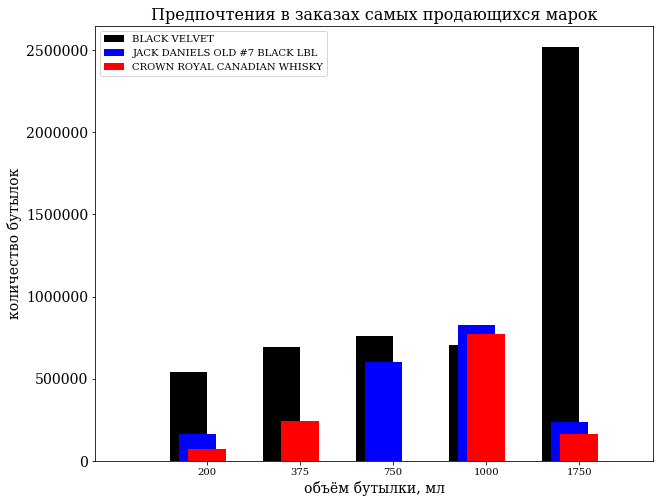

In [159]:
figsize(10, 8)
nd = np.arange(5)
width = 0.8
fig, ax = plt.subplots()
p1 = ax.bar(np.array([0, 1, 2, 3, 4]),\
            np.array([float(total_year_sales.loc[('BLACK VELVET', 200), :]),
                      float(total_year_sales.loc[('BLACK VELVET', 375), :]),
                      float(total_year_sales.loc[('BLACK VELVET', 750), :]),
                      float(total_year_sales.loc[('BLACK VELVET', 1000), :]),
                      float(total_year_sales.loc[('BLACK VELVET', 1750), :])]),\
            width / 2, color='black')
p2 = ax.bar(np.array([0, 2, 3, 4]) + width / 8,\
            np.array([float(total_year_sales.loc[('JACK DANIELS OLD #7 BLACK LBL', 200), :]),
                      float(total_year_sales.loc[('JACK DANIELS OLD #7 BLACK LBL', 750), :]),
                      float(total_year_sales.loc[('JACK DANIELS OLD #7 BLACK LBL', 1000), :]),
                      float(total_year_sales.loc[('JACK DANIELS OLD #7 BLACK LBL', 1750), :])]), width / 2,\
            color='blue')
p3 = ax.bar(np.array([0, 1, 3, 4]) + width / 4,\
            np.array([float(total_year_sales.loc[('CROWN ROYAL CANADIAN WHISKY', 200), :]),
                      float(total_year_sales.loc[('CROWN ROYAL CANADIAN WHISKY', 375), :]),
                      float(total_year_sales.loc[('CROWN ROYAL CANADIAN WHISKY', 1000), :]),
                      float(total_year_sales.loc[('CROWN ROYAL CANADIAN WHISKY', 1750), :])]),\
            width / 2, color='red')
plt.xticks(nd + width / 4, ('200', '375', '750', '1000', '1750'), fontsize=10)
ax.legend((p1[0], p2[0], p3[0]), ('BLACK VELVET', 'JACK DANIELS OLD #7 BLACK LBL',\
                                  'CROWN ROYAL CANADIAN WHISKY'))
plt.xlim(-1, 5)
plt.xlabel('объём бутылки, мл', fontsize=14)
plt.ylabel('количество бутылок', fontsize=14)
#plt.xticks(rotation=45)
plt.title('Предпочтения в заказах самых продающихся марок', fontsize=16)
plt.show()